<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Михаил! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert alert-info">
<b> Комментарий студента</b>

Привет! 

</div>

# Прекод

# Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

### Описание данных

Данные лежат в папке `/datasets/image_search/`.

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

## 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке: 

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке. 
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


Начнём с импорта необходимых библиотек. 

In [117]:
import pandas as pd
from os import listdir
import os 
import numpy as np
from pymystem3 import Mystem
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import word_tokenize, pos_tag 
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import RootMeanSquaredError
import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import torch
import transformers 
from tqdm import notebook
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image


DATA_PATH = 'data/datasets/image_search'
DATA_PATH_RES50 = 'data/datasets/'

<div class="alert alert-info">
<b> Комментарий студента</b>

Добавил значение переменной, отвечающей за путь к данным. Поменял способ построения пути до файлов. Для коэффициентов ResNet50 указан отдельный путь, потому что она не относится к данным. 

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

Импортируем данные и познакомимся с ними. В первом датасете содержится информация о названии изображения и текстовом комментарии к нему. 

In [2]:
trainData = pd.read_csv(
                    os.path.join(DATA_PATH, 'train_dataset.csv')
)

display(trainData.head(5))
trainData.info()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  
0  A young child is wearing blue goggles and sitt...  
1  A young child is wearing blue goggles and sitt...  
2  A young child is wearing blue goggles and sitt...  
3  A young child is wearing blue goggles and sitt...  
4  A young child is wearing blue goggles and sitt...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Очень "больная тема" - это загрузка данных и использование путей.Очевидно, что на моей машине (и скорее всего машине любого другого пользователя) пути к данным будут другие. И это "рабочая ситуация для большинства проектов. Решается она следующим образом:
 
    
  - Путь к директории с данными  должен быть задан в константе, в самом начале работы. Тогда ревьюеру (или любому другому пользователю твоего ноутбука, даже тебе самому, если нужно будет провести презентацию руководителю на другом компьютере) нужно будет изменить только этот путь.
  - Все остальные пути внутри ноутбука должны быть созданы с исопользованием path, а не заданы жестко (есть сленговое определение "хардкод").  Более  того, настоятельно рекомендую для создания сложных путей вместо простой конкатерации строк с исползованием '/' использовать os.path.join(), тогда код будет одинаково надежно работать и в среде Windows и Linux (MacOS).
   
Чтобы запустить твой код при проверке я был вынужден руками менять код по всему ноутбуку. Прошу тебя внести изменения так, чтобы путь к данным нужно было изменять всего один раз.

Кстати, поделюсь способом быстрой загрузки данных в Google Colab, если решишь воспользоваться им.
    
    # загрузка датасета 

    !wget -q https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip
    !unzip -q dsplus_integrated_project_4.zip

    DATA_PATH = '/content/to_upload'
     
    
    
</div>

In [3]:
print('Различных описаний: ', len(trainData.query_text.unique()))
print('Различных изображений: ', len(trainData.image.unique()))

display(trainData[trainData['image'] == '2549968784_39bfbe44f9.jpg'])

Различных описаний:  977
Различных изображений:  1000


image                     query_id  \
3     2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4160  2549968784_39bfbe44f9.jpg  2490768374_45d94fc658.jpg#2   
5134  2549968784_39bfbe44f9.jpg  2384353160_f395e9a54b.jpg#2   
5137  2549968784_39bfbe44f9.jpg  3532205154_5674b628ea.jpg#2   

                                             query_text  
3     A young child is wearing blue goggles and sitt...  
4160                 a young girl wearing blue smiles .  
5134  An older man in a weathered fedora smiles slig...  
5137  A man with a shocked expression on his face is...

В файле с описаниями 5822 записи, уникальных описаний 977. Идентификатор описания на первый взгляд устроен не очень удобно, могут быть сложности с восстановлением взаимосвязи картинок друг с другом. 

Проверим, что идетификатор описания действительно является уникальным идентификатором описания. 

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [4]:
print(trainData[['query_text', 'query_id']].drop_duplicates().shape)
print(print(len(trainData.query_id.unique())))

(977, 2)
977
None


Идентификатор действительно является идентификатором, можем двигаться дальше. 

Импортируем данные, собранные с помощью крауд сорсинга.  

In [5]:
crowdEstimation = pd.read_csv(
    os.path.join(DATA_PATH, 'CrowdAnnotations.tsv'),
    sep='\t', 
    header=None
)

display(crowdEstimation.head())

crowdEstimation.info()

0                            1    2  3  4
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2  1.0  3  0
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2  0.0  0  3
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2  0.0  0  3
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2  0.0  0  3
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2  0.0  0  3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       47830 non-null  object 
 1   1       47830 non-null  object 
 2   2       47830 non-null  float64
 3   3       47830 non-null  int64  
 4   4       47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


В датасете 47 830 пар картинка — описание. Это существенно больше, чем количество изначальных пар картинка - описание. Скорее всего, при сборе информации с помощью краудсорсинга пользователи получали описания, не относящиеся к изображению, и должны были их оценить. Такие оценки полезны, чтобы выделять заведомо не подходящие под описание картинки. 

Посмотрим подробнее на этот датасет. 

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, рассмотрели краудсорс-оценки</div>

In [6]:
crowdEstimation.columns = ['image_id', 'query_id', 'part_correct', 'count_correct', 'count_wrong']

print('Количество описаний: ', len(crowdEstimation.query_id.unique()))
print('Количество изображений: ', len(crowdEstimation.image_id.unique()))

Количество описаний:  1000
Количество изображений:  1000


Среди оценок, собранных с помощью краудсорсинга есть пары, относящиеся к 1000 разлиных изображений и оценено 1000 различных комментариев. Однако, у нас есть тексты всего 977 комментариев, по остальным мы не можем получить полезной информации и записи надо исключить из рассмотрения. 

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, совершенно логично.</div>

In [7]:
crowdEstimation = crowdEstimation[crowdEstimation.query_id.isin(trainData.query_id.unique())]

print('Количество описаний: ', len(crowdEstimation.query_id.unique()))
print('Количество изображений: ', len(crowdEstimation.image_id.unique()))

crowdEstimation.info()

Количество описаний:  977
Количество изображений:  1000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46721 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   image_id       46721 non-null  object 
 1   query_id       46721 non-null  object 
 2   part_correct   46721 non-null  float64
 3   count_correct  46721 non-null  int64  
 4   count_wrong    46721 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ MB


Было удалено 1 100 записей, или чуть больше 2%. На текущем этапе это допустимые потери данных, тем более восстановить данные у нас возможности нет. Но в будущем при построении полноценной модели данные будет полезно восстановить, проконсультировавшись с тем, от кого они были получены. 

Исследуем, сколько пользователей оценивали каждый из комментариев при оценки комментариев с помощью краудсорсинга. 

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [8]:
crowdEstimation = crowdEstimation.reset_index(drop=True)

crowdEstimation['total_count'] = crowdEstimation.count_correct + crowdEstimation.count_wrong
crowdEstimation['compute_part'] = abs(crowdEstimation.count_correct / crowdEstimation.total_count - 
                                      crowdEstimation.part_correct) < 0.01

display(crowdEstimation[crowdEstimation.compute_part == False].head())
print('Максимальное значение количества оценок: ', max(crowdEstimation.total_count))
print('Максимальное значение количества оценок: ', min(crowdEstimation.total_count))

Empty DataFrame
Columns: [image_id, query_id, part_correct, count_correct, count_wrong, total_count, compute_part]
Index: []

Максимальное значение количества оценок:  6
Максимальное значение количества оценок:  3


Каждый комментарий сравнивало с картиной от 3 до 6 экспертов. Сравнение было бинарным и значение столбца "доля подтверждённых сообщений" получено как отношение положительных оценок к сумме положительных и отрицательных оценок. 

Посмотрим на статистику, по сколько оценок выставлялось для пары картинка - комментарий. 

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [9]:
crowdEstimation.groupby('total_count')['query_id'].agg('count')

total_count
3    45699
4      763
5      209
6       50
Name: query_id, dtype: int64

Для большинства комментариев оценки выставляло 3 пользователя. Будем ориантироваться на это значение и долю от количества положительных оценок как на вероятность, что комментарий совпал с картинкой. 

Оставим в датасете только нужные для дальнейшей работы столбцы: идентификаторы изображения и комментария, а так же выставленную оценку. 

In [10]:
crowdEstimationShort = crowdEstimation[['image_id', 'query_id', 'part_correct']]

Рассмотрим следующий датасет — оценки, выставленные экспертами. 

In [11]:
expertEstimation = pd.read_csv(
    os.path.join(DATA_PATH, 'ExpertAnnotations.tsv'), 
    sep='\t', 
    header=None
)


expertEstimation.columns = ['image_id', 'query_id', 'expert_1', 'expert_2', 'expert_3']

print('Количество описаний: ', len(expertEstimation.query_id.unique()))
print('Количество изображений: ', len(expertEstimation.image_id.unique()))

display(expertEstimation.head())

expertEstimation.info()

Количество описаний:  977
Количество изображений:  1000


image_id                     query_id  expert_1  expert_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2         1         1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2         1         1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2         1         1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2         1         2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2         1         1   

   expert_3  
0         1  
1         2  
2         2  
3         2  
4         2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  5822 non-null   object
 1   query_id  5822 non-null   object
 2   expert_1  5822 non-null   int64 
 3   expert_2  5822 non-null   int64 
 4   expert_3  5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


В датасете ожидаемое количество идентификаторов изображений и комментариев. 

Построим общий датасет, на основании которого построим целевой признак вероятности совпадения изображения и описания.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 ОК, рассмотрены экспертные оценки</div>

In [12]:
trainData.columns = ['image_id', 'query_id', 'query_text']

data = (
    trainData
    .merge(expertEstimation, on=['image_id', 'query_id'])
    .merge(crowdEstimationShort, on=['image_id', 'query_id'], how='outer')
)

display(data.head())
data.info()

image_id                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  expert_1  expert_2  \
0  A young child is wearing blue goggles and sitt...       1.0       1.0   
1  A young child is wearing blue goggles and sitt...       1.0       1.0   
2  A young child is wearing blue goggles and sitt...       1.0       2.0   
3  A young child is wearing blue goggles and sitt...       4.0       4.0   
4  A young child is wearing blue goggles and sitt...       1.0       1.0   

   expert_3  part_correct  
0       1.0           0.0  
1       1.0           NaN  
2       2.0           0.0  
3       4.0           1.0  
4       1.0           NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50214 entries, 0 to 50213
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image_id      50214 non-null  object 
 1   query_id      50214 non-null  object 
 2   query_text    5822 non-null   object 
 3   expert_1      5822 non-null   float64
 4   expert_2      5822 non-null   float64
 5   expert_3      5822 non-null   float64
 6   part_correct  46721 non-null  float64
dtypes: float64(4), object(3)
memory usage: 3.1+ MB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

 Поправим датасет, чтобы текст комментария был в каждой строке. Сейчас в части строк есть только id комментария. 

In [13]:
data = data.drop('query_text', axis=1)
comments = trainData[['query_id', 'query_text']]
comments = comments.drop_duplicates().reset_index(drop=True)
data = data.merge(comments, on='query_id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50214 entries, 0 to 50213
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image_id      50214 non-null  object 
 1   query_id      50214 non-null  object 
 2   expert_1      5822 non-null   float64
 3   expert_2      5822 non-null   float64
 4   expert_3      5822 non-null   float64
 5   part_correct  46721 non-null  float64
 6   query_text    50214 non-null  object 
dtypes: float64(4), object(3)
memory usage: 3.1+ MB


Соответствие картинки и комментария может быть оценено: 
- только экспертами, в этом случае будем использовать среднюю оценку по 3 экспертам. 
- только с помощью краудинговых данных, в этом случае возьмём вероятность совпадения без изменения. 
- и экспертами и граудинговыми данными, в этом случае возьмём комбинацию двух оценок с коэффициентами 0.7 для экспертов и 0.3 для краудинговых данных. 

Итоговое значение вероятности поместим в поле target. 

In [14]:
data['target'] = 0.0

for i in range(data.shape[0]):
    # Вариант 1, нет экспертной оценки
    if np.isnan(data.loc[i, 'expert_1']):
        data.loc[i, 'target'] = data.loc[i, 'part_correct']
    # Вариант 2, есть оценки только экспертов
    elif np.isnan(data.loc[i, 'part_correct']):
        x1 = (data.loc[i, 'expert_1'] - 1.) / 3.
        x2 = (data.loc[i, 'expert_2'] - 1.) / 3.
        x3 = (data.loc[i, 'expert_3'] - 1.) / 3.
        data.loc[i, 'target'] = (x1 + x2 + x3) / 3.
    # Вариант 3, есть оба типа оценок
    else:
        x1 = (data.loc[i, 'expert_1'] - 1.) / 3.
        x2 = (data.loc[i, 'expert_2'] - 1.) / 3.
        x3 = (data.loc[i, 'expert_3'] - 1.) / 3.
        data.loc[i, 'target'] = 0.3 * data.loc[i, 'part_correct'] + 0.7 * (x1 + x2 + x3) / 3.

data.head()

image_id                     query_id  expert_1  expert_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2       1.0       1.0   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2       1.0       1.0   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2       1.0       2.0   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2       4.0       4.0   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2       1.0       1.0   

   expert_3  part_correct                                         query_text  \
0       1.0           0.0  A young child is wearing blue goggles and sitt...   
1       1.0           NaN  A young child is wearing blue goggles and sitt...   
2       2.0           0.0  A young child is wearing blue goggles and sitt...   
3       4.0           1.0  A young child is wearing blue goggles and sitt...   
4       1.0           NaN  A young child is wearing blue goggles and sitt...   

     target  
0  0.000000  
1  0.000000  
2  0.155556  
3  1.000000  
4  0.000000

Построили значение целевого признака, проверим, что значения попадают в интервал от 0 до 1. 

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Все ОК, объединили оценки экспертов и краудсорса, получили взвешенные оценки, привели к масштабу 0-1. 
    
Молодец, что выжал максимум из доступных данных и использовал все оценки. (Экспертов и краудсорс)    

</div>

In [15]:
print(min(data.target), max(data.target))

0.0 1.0


**Вывод**. 

Обработали данные, рассчитали целевой признак. 

## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
> 

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

Найдём список слов, которые могут свидетельствовать о том, что на картинке изображены дети до 16 лет. Возьмём только те пары картинка - описание, которые подходтяд друг к другу с вероятностью более 50%. 

In [16]:
len(data[data['target'] > 0.5]['query_text'].unique())

821

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Идея с лемматизацией хороша. Но она очень "дорогая" - хорошая лемматизация занимает время. Поэтому я считаю возможным упростить себе жизнь - взять возможные словоформы "запрещенных" слов. Как правило их всего две - единственное и множественное число. 
        
Впрочем,  ты уже провел лемматизацию, поэтому ничего страшного, если она останется.    
</div>

Почти все комментарии хотя бы раз использованы рядом с текстом, которому они соответствуют. Лемматизируем описания и выберем те слова, которые мы хотим исключить. 

In [17]:
wnl = WordNetLemmatizer()

def lemmatize(txt):
    return [wnl.lemmatize(i,j[0].lower()) if j[0].lower() in ['a','n','v'] else wnl.lemmatize(i) for i,j in pos_tag(word_tokenize(txt))] #''.join(m.lemmatize(text, pos='v'))

lemmas = data[data['target'] > 0.5][['query_id', 'query_text']].drop_duplicates().reset_index(drop=True)

lemmas['lemmas'] =  ''
my_list = []

for i in range(lemmas.shape[0]):
    #try: 
    tmp = lemmatize(lemmas.loc[i, 'query_text'])
    my_list += tmp
    lemmas.loc[i, 'lemmas'] = ' '.join(tmp)
    #except:
    #    print(i, sep='')
    
my_list = list(set(my_list))
my_list.sort()

print(my_list)


['&', "'s", ',', '.', '12', '28', '4', '5', '58', ';', 'A', 'ATV', 'Albert', 'An', 'Arizona', 'Arts', 'Asian', 'BMX', 'Basketball', 'Black', 'Boat', 'Boys', 'Brown', 'Buena', 'Center', 'Challenge', 'Child', 'Children', 'Chinese', 'Christmas', 'Close-up', 'Collie', 'Crowded', 'DJs', 'Day', 'Dog', 'Dogs', 'Einstein', 'Five', 'Football', 'Four', 'Free', 'Friends', 'Frisbee', 'Girl', 'Girls', 'Gras', 'Group', 'Hawaiian', 'Hell', 'Hockey', 'Hugs', 'Incredible', 'Indian', 'Israeli', 'Jesus', 'Kids', 'Large', 'Little', 'Man', 'Many', 'Mardi', 'Men', 'Mexican', 'Miami', 'Mohawk', 'Muslim', 'Nash', 'Obama', 'One', 'Orca', 'Patricks', 'People', 'Person', 'Purina', 'Rafting', 'Real', 'SUV', 'Several', 'Sheltie', 'Small', 'Snowboarder', 'Some', 'Someone', 'Sooners', 'Spain', 'St', 'State', 'Steve', 'Team', 'The', 'Three', 'Tourists', 'Two', 'VW', 'Yerba', '``', 'a', 'about', 'above', 'across', 'action', 'actor', 'adult', 'aerial', 'after', 'against', 'age', 'ahead', 'aim', 'air', 'airborne', 'airp

In [18]:

'''stopWords = ['Boys', 'Child', 'Children', 
             'Girl', 'Girls', 'Kids', 'boy', 'child', 
             'kid', 'kiddie', 'children', 'girl', 'girls', 'young', 'youth']
'''

stopWords = ['Child', 'Children', 
             'Kids',  'child', 
             'kid', 'kiddie', 'children']


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Молодец, выделил "стоп-слова".
 

In [19]:
def find_bad_comments(text):
    lemmasList = text.split()
    for word in stopWords:
        if word in lemmasList:
            return True
    return False

lemmas['is_bad'] = lemmas['lemmas'].apply(find_bad_comments)

print(lemmas[lemmas['is_bad'] == True].shape[0])

display(lemmas[lemmas['is_bad'] == True].head(10))

63


query_id  \
0   2549968784_39bfbe44f9.jpg#2   
4   3545652636_0746537307.jpg#2   
7   2140182410_8e2a06fbda.jpg#2   
16  2358554995_54ed3baa83.jpg#2   
25  2274992140_bb9e868bb8.jpg#2   
46  3245460937_2710a82709.jpg#2   
58  3239021459_a6b71bb400.jpg#2   
63   533713007_bf9f3e25b4.jpg#2   
69  2228022180_9597b2a458.jpg#2   
76  3280052365_c4644bf0a5.jpg#2   

                                           query_text  \
0   A young child is wearing blue goggles and sitt...   
4   A young boy dressed in a red uniform kicks the...   
7                 The kid is on a float in the snow .   
16  A child is preparing to slide down a piece of ...   
25  Two little children and one is playing with a ...   
46                A child jumping on a tennis court .   
58  A child sleds over a mound of snow as others w...   
63         Child sitting at a backyard picnic table .   
69  Group of children in blue uniforms sitting on ...   
76  Two woman and a child look at each other while...   

                                               lemmas  is_bad  
0   A young child be wear blue goggles and sit in ...    True  
4   A young boy dress in a red uniform kick the so...    True  
7                 The kid be on a float in the snow .    True  
16  A child be prepare to slide down a piece of pl...    True  
25   Two little child and one be play with a slinky .    True  
46                   A child jump on a tennis court .    True  
58  A child sled over a mound of snow a others wat...    True  
63             Child sit at a backyard picnic table .    True  
69       Group of child in blue uniform sit on step .    True  
76  Two woman and a child look at each other while...    True

63 описания погут подподать под нежелательные, в нашем случае это почти четверть выборки, что не очень хорошо. Просмотр текстов описаний демонстрирует, что они действительно подпадают под контент, который мы хотим исключить. 

На этапе исследования отбрасывания этой части данных неприятно, но так как для нас сейчас первична проверка гипотезы, то отбросим эти комментарии. 

In [20]:
badCommentsId = lemmas[lemmas['is_bad'] == True]['query_id'].to_list()
badImagesId = data[(data['query_id'].isin(badCommentsId) == True) & (data['target'] > 0.5)]['image_id'].to_list()
dataShort = data[data['image_id'].isin(badImagesId) == False].reset_index(drop=True)
print(len(list(set(badImagesId))))
dataShort.info()

114
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44299 entries, 0 to 44298
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image_id      44299 non-null  object 
 1   query_id      44299 non-null  object 
 2   expert_1      5129 non-null   float64
 3   expert_2      5129 non-null   float64
 4   expert_3      5129 non-null   float64
 5   part_correct  41218 non-null  float64
 6   query_text    44299 non-null  object 
 7   target        44299 non-null  float64
dtypes: float64(5), object(3)
memory usage: 2.7+ MB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Почистили датасет от "запрещенного" контента. Молодец, что испольовал не только признак вхождения нежелательных слов в запрос, но и учел степень соответствия между описанием и изображением.
 

**Вывод** По описаниям, которые по ключевым словам определены как нежелательные, мы выбрали изображения, которые отмечены как подходящие под описание, и исключили их из рассмотрения. В общей сложности пришлось исключить 114 изображения. 

Выбрали более мягкий набор ключевых слов, чтобы было явное указание на слова kid / child, так как слова boy / girl в английском языке имееют широкий спектр смысло, не всегда относящихся к несовершеннолетним детям и при попытке добавить их в чёрный список пришлось бы удалить существенно больше половины всех изображений. 

## 3. Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
   
Я вижу, что в проекте ты используешь нейронные сети написанные с ипользованием разных фреймворков. Сейчас ты используешь  Keras (надстройка над TF), а для текста ты используешь модели на базе pytorch.

Возможно это хорошо для развития навыков, но в боевых проектах стараются использовать только один фреймворк, т.к. настройка двух DL-фреймворков - это очень трудоемко и они даже могут конфликтовать в рамках одного виртуального окружения.
        
</div>

In [22]:
ResNet50_model = ResNet50(input_shape=(224, 224, 3),
                         include_top=False,
#                         weights='imagenet')
                         weights= os.path.join(DATA_PATH_RES50, 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')
                         )

2023-01-21 17:49:43.755667: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Импортировали пердобученную модель ResNet50 без слоёв, отвечающих за классификацию. Добавим ещё один слой глобального пулинга, чтобы уменьшить длинну вектора, который мы будем получать по изображению, это уменьшит время обучения нашей модели при проведении исследования.

In [23]:
modelImg = Sequential()
modelImg.add(ResNet50_model)
modelImg.add(GlobalAveragePooling2D())

modelImg.compile()
modelImg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
_________________________________________________________________


In [24]:
dataShortImageList = dataShort['image_id'].drop_duplicates().reset_index(drop=True)
print(dataShortImageList.shape[0])

886


Получили список из 886 изображений, которые надо пропустить через нейросеть, чтобы получить матрицу признаков. 

In [138]:
def image_to_vec(imageList, path):
    tmp = []
    
    for i in range(imageList.shape[0]):
        x = Image.open( 
            os.path.join(
                path, 
                imageList[i]
                        )  
        ).resize((224, 224))

        y = []
        y.append(np.array(x))
        y = np.asarray(y)
        prediction = modelImg.predict(y)
        tmp.append(prediction[0])
        
    return tmp 

<div class="alert alert-info">
<b> Комментарий студента</b>

Спасибо за подсказку :) Поменял способ открытия изображений. 
    
Дополнительно обернул преобразование изображений в функцию, чтобы потом её использовать для изображений, использованных в тестовой выборке. 

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не очеь удачаная идея использовать cv2 для чтения и ресайза изображений. Уверен, что эту задачу легко можно выполнить при помощи Keras. Или использовать стардарнтый для python модуль PIL.
    
    
cv2 достойная библиотека, с которой нужно обязательно познакомиться. Но тянуть её в проект только ради "прочитать изобрражение" на мой взгляд избыточно.    
</div>

In [39]:
%%capture
tmp = image_to_vec(
    dataShortImageList,
    os.path.join(DATA_PATH, 'train_images')
)

dataImageVec = pd.DataFrame(tmp)

dataImageVec = pd.merge(dataImageVec, dataShortImageList, left_index=True, right_index=True)

display(dataImageVec.head())

dataImageVec.info()

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Еще один момент. Я вижу что ты используешь pandas как универсальное хранилище данных. В рамках прототипа это ОК. Но стоит понимать, что данные внутри датафрейма хранятся очень неоптимально по сравнению с массивами и объем потребляемой памяти и скорость доступа сильно ухудшаются. 
</div>

**Вывод**. 
Сделали векторизацию изображений, подготовили первый блок данных для обучения модели. 

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, вектра для изображений получены👍 </div>

## 4. Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.


Векторизуем тексты. Выберем тексты, которые необходимо векторизовать. 

In [40]:
dataShort.columns

Index(['image_id', 'query_id', 'expert_1', 'expert_2', 'expert_3',
       'part_correct', 'query_text', 'target'],
      dtype='object')

In [41]:
dataText = dataShort[['query_id', 'query_text']].drop_duplicates().reset_index(drop=True)
dataText.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    977 non-null    object
 1   query_text  977 non-null    object
dtypes: object(2)
memory usage: 15.4+ KB


Векторизовать необходимо 977 различных комментариев. 

In [42]:
tokenizer = transformers.BertTokenizer.from_pretrained("bert-base-uncased")
bertModel = transformers.BertModel.from_pretrained("bert-base-uncased") 

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Сделаем векторизацию текста с помощью эмбендингов. Построим функцию, которая на вход принимает тексты, а возвращает numpy массив с векторизованными данными. 

In [56]:
def lower_case(text):
    return text.lower()

def text_to_vec(df):
    df = df.apply(lower_case)
    
    tokenized = df.apply(
        lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True)
    )    
    
    maxLen = min(
        max(tokenized.apply(len)), 
        512
    )
    
    padded = np.array([i + [0]*(maxLen - len(i)) for i in tokenized.values])
    attention_mask = np.where(padded != 0, 1, 0)
    
    batch_size = 1
    embeddings = []
    for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
            batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
            attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])

            with torch.no_grad():
                batch_embeddings = bertModel(batch, attention_mask=attention_mask_batch)

            embeddings.append(batch_embeddings[0][:,0,:].numpy()) 
    
    return np.concatenate(embeddings)
    

<div class="alert alert-info">
<b> Комментарий студента</b>

Воспользовался советом, добавил переменную, отвечающую за максимальную длинну теста. 
    
Дополнительно обернул векторизацию текста в функцию, чтобы переиспользовать её для тестовых данных

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Здесь ты захардкодил число 512. Предлагаю во первых вынести его в константу. А во вторых скорость работы BERT зависит от длинны последовательности. Максимальная длина последовательности меньше 40 и есть смысл привести последовательности к этой длинне. В моем случае это ускорило извлечение признаков с помощью BERT c 16 до 2 минут (т.е. в 8 раз).
</div>

Вызываем построенную функцию, чтобы сделать векторизацию текстов. 

In [57]:
textFeatures = pd.DataFrame(
    text_to_vec(dataText['query_text'])
)

textFeatures = pd.merge(dataText, textFeatures, left_index=True, right_index=True)

print(textFeatures.shape)
textFeatures.head()


  0%|          | 0/977 [00:00<?, ?it/s]

(977, 770)


query_id  \
0  2549968784_39bfbe44f9.jpg#2   
1  2718495608_d8533e3ac5.jpg#2   
2  3181701312_70a379ab6e.jpg#2   
3  3207358897_bfa61fa3c6.jpg#2   
4  3286822339_5535af6b93.jpg#2   

                                          query_text         0         1  \
0  a young child is wearing blue goggles and sitt... -0.047877  0.051415   
1  a girl wearing a yellow shirt and sunglasses s...  0.306461  0.187397   
2    a man sleeps under a blanket on a city street .  0.225945 -0.147770   
3  a woman plays with long red ribbons in an empt...  0.363719  0.163009   
4         chinese market street in the winter time . -0.368423 -0.235774   

          2         3         4         5         6         7  ...       758  \
0 -0.272813 -0.072299  0.047598 -0.743571  0.045497  0.837148  ... -0.365719   
1 -0.317479 -0.147754  0.092267 -0.241827  0.248197  0.775116  ... -0.326402   
2 -0.410427  0.009857  0.024526 -0.012760 -0.160295  1.200930  ... -0.113070   
3 -0.490554  0.019928  0.072833 -0.125191 -0.251206  0.910355  ... -0.033179   
4 -0.305801  0.175350  0.182788 -0.072999  0.053588  1.238183  ...  0.186065   

        759       760       761       762       763       764       765  \
0 -0.110822 -0.342743 -0.105674 -0.026857  0.914323  0.184041  0.020952   
1  0.434386 -0.106929  0.084436 -0.069695  0.619139  0.204060 -0.192757   
2 -0.112948 -0.309222 -0.056992  0.130479  0.988332 -0.092634 -0.319207   
3  0.282282 -0.214147  0.347063  0.388014  0.896651  0.471118 -0.301245   
4 -0.355032 -0.142532  0.475379  0.240221 -0.005224 -0.248849 -0.535117   

        766       767  
0  0.323602  0.604958  
1  0.181119  0.577594  
2  0.430009  0.243056  
3  0.148654  0.346313  
4  0.498605  0.076597  

[5 rows x 770 columns]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично,полученные векторные представления для текстов описаний с помощью BERT </div>

**Вывод**.
Реализовали векторизацию текстов. В датафрэйм с векторизованными текстами добавили идентификатор текста, чтобы соотнести данные с векторизованными признаками для изображений. 

Теперь можем перейти к объединению признаков и обучению целевой модели. 

## 5. Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

При обучении модели необходимо разбить данные на обучающую и валидационную выборки так, чтобы одно изображение не попадало в разные выборки. Таким образом, нам надо подготовить датафрейм, в котором будут: 
- идентификатор картинки
- векторизация картинки
- векторизация текста
- целевой признак

In [58]:
features = data[['image_id', 'query_id', 'target']]

features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50214 entries, 0 to 50213
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  50214 non-null  object 
 1   query_id  50214 non-null  object 
 2   target    50214 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.5+ MB


In [59]:
features = features.merge(textFeatures, on='query_id')

features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50214 entries, 0 to 50213
Columns: 772 entries, image_id to 767
dtypes: float32(768), float64(1), object(3)
memory usage: 149.0+ MB


In [60]:
features = features.merge(dataImageVec, on='image_id')

features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44299 entries, 0 to 44298
Columns: 2820 entries, image_id to 2047
dtypes: float32(2816), float64(1), object(3)
memory usage: 477.6+ MB


In [61]:
features = features.drop(['query_id', 'query_text'], axis=1)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

**Вывод**. 
Подготовили данные для обучения модели.

UPD. Объединили две группы признаков, полученные на основе веекторизации изображений и текста. Для каждого изображения построен вектор из 2048 признаков, для текстов описаний вектор из 768 признаков. В общей сложности в данных 2816 признаков без учёта целевого. 

<div class="alert alert-info">
<b> Комментарий студента</b>

Добавил пояснение. 

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Стоит добавить информацию о том, какие размерности признаков мы получили из текстов, изображений и какая размерность признаков получилась в итоге.
</div>

## 6. Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

Начнём с разбиения на тестовую и валидационную выборку. 

In [62]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)

indicesTrain, indicesValid = next(gss.split(X=features.drop(columns=['target']), 
                                              y=features['target'], 
                                              groups=features['image_id']))

target = features['target']
features = features.drop(['image_id', 'target'], axis=1)

featuresTrain, featuresValid = features.loc[indicesTrain], features.loc[indicesValid]
targetTrain, targetValid = target.loc[indicesTrain], target.loc[indicesValid]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

Обучим модель линейной регрессии. В качестве метрики качества выберем RMSE. 

<div class="alert alert-info">
<b> Пояснение к выбору RMSE</b>

Перед нами задача построения рейтинга "похожести" картинки на предложенное описание. Чтобы построить рейтинг, нам важна удалённость нашего предсказания от реального значения. Поэтому лучше использовать какую-нибудь непрерывную метрику. Выберем RMSE, потому что она начинает сильнее "штрафовать" модель за далёкие предсказения MAE.  

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В этом задании требуется выбрать основную метрику, которую ты будешь оптимизировать. Вижу чтоты выбрал RMSE. Пожаулуйста  обоснуй свой выбор.  </div>

In [63]:
modelLR = LinearRegression()

modelLR.fit(featuresTrain, targetTrain)
score = mean_squared_error(targetValid, modelLR.predict(featuresValid), squared=False)
print('Значение RMSE для линейной модели на валидационной выборке равно', score)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Значение RMSE для линейной модели на валидационной выборке равно 149.6020148031229


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [64]:
targetValid.head()

109    0.155556
110    0.000000
111    0.000000
112    0.000000
113    0.000000
Name: target, dtype: float64

Обучим ещё одну модель – модуль случайного леса. 

''' Перебор параметров для модели случайного леса
Даже для одного набора параметров модель учится достаточно долго на локальной машине, поэтому перебор пока за кадром. 
'''


score_values_forest = []
best_depth_forest = 0
best_number_est_forest = 0
best_score_forest = 1.

for i in range(10, 50, 5):
    for j in range(10, 25):
        model = RandomForestRegressor(n_estimators=i, max_depth=j, random_state=123, criterion='squared_error')
        model.fit(featuresTrain, targetTrain)
        score = mean_squared_error(targetValid, model.predict(featuresValid))
        score_values_forest.append([i, j, score])
        if score < best_score_forest:
            best_model_forest = model
            best_depth_forest = j
            best_number_est_forest = i
            best_score_forest = score
            print(i, j, score)

In [65]:
modelRF = RandomForestRegressor(n_estimators=60, max_depth=8, random_state=123, criterion='squared_error')
modelRF.fit(featuresTrain, targetTrain)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(max_depth=8, n_estimators=60, random_state=123)

In [67]:
errorVal = mean_squared_error(targetValid, modelRF.predict(featuresValid), squared=False)
errorTrain = mean_squared_error(targetTrain, modelRF.predict(featuresTrain), squared=False)
print(errorVal, errorTrain)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.1995021094565935 0.17853164655087722


50 10 0.19 0.16
100 12 0.19 0.15
60 8 0.19 0.18

**Вывод**
Построили две самые простые модели: модель линейной регрессии и модель случайного леса. Попробуем проверить результат их работы.  

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Если подходить формально - то все ОК и ты исследовал две модели. Но без попытки применить нейронную сеть проект выглядит незавершеным )))
    
Тем более что на создание простой полносвязной нейроной сети с использованием Keras Sequentional врядли нужно много времени.    
    
</div>

Построим простую трёслойную нейронную сеть в качестве третей модели для тестирования. 

<div class="alert alert-info">
<b> Комментарий студента</b>

Добавил нейронную есть и поэкспериментировал с параметрами. Возможно из-за того, что мало данных или из-за неправильной подготовки, но нейросеть достаточно быстро оказывается в точке равновесия и перестаёт учиться.  

</div>

In [121]:
modelNet = Sequential()
modelNet.add(Dense(1024, activation='relu'))
modelNet.add(Dense(256, activation='relu'))
modelNet.add(Dense(64, activation='relu'))
modelNet.add(Dense(1, activation='relu'))
modelNet.compile(optimizer='adam', loss='mean_squared_logarithmic_error', metrics=[RootMeanSquaredError()])

modelNet.fit(featuresTrain, 
             targetTrain, 
             validation_data=(featuresValid, targetValid), 
#             steps_per_epoch=5, 
             epochs=5,
             batch_size=5000,
             #verbose=2, 
             shuffle=True
            )

Epoch 1/5
7/7 [==============================] - 3s 306ms/step - loss: 0.0333 - root_mean_squared_error: 0.2416 - val_loss: 0.0278 - val_root_mean_squared_error: 0.2219
Epoch 2/5
7/7 [==============================] - 2s 225ms/step - loss: 0.0278 - root_mean_squared_error: 0.2219 - val_loss: 0.0278 - val_root_mean_squared_error: 0.2219
Epoch 3/5
7/7 [==============================] - 2s 226ms/step - loss: 0.0278 - root_mean_squared_error: 0.2219 - val_loss: 0.0278 - val_root_mean_squared_error: 0.2219
Epoch 4/5
7/7 [==============================] - 2s 232ms/step - loss: 0.0278 - root_mean_squared_error: 0.2219 - val_loss: 0.0278 - val_root_mean_squared_error: 0.2219
Epoch 5/5
7/7 [==============================] - 2s 267ms/step - loss: 0.0278 - root_mean_squared_error: 0.2219 - val_loss: 0.0278 - val_root_mean_squared_error: 0.2219


## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

<div class="alert alert-info">
<b> Комментарий студента</b>

Переработал этот кусок, выделил функцию для тестирования отдельного текста.  

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь я попрошу тебя немного переделать логику инференса.
    
Ты уже на финишной прямой курса и во всю ипользуешь функции. Поэтому я попрошу тебя оформить тестирование следующим образом: нужно написать функцию, способную искать изображение по тексту для одного изображения.
 
  Что должна делаь функция
    
   - Получать текст
   - Возвращать картинку и метрику близости. 
   - Выдавать дисклеймер если запрос некорректный
    
А затем нужно 10 раз применить функцию к 10 случайным запросам.    
    
Естественно, подготовительную работу (векторизация изображений) можно сделать заранее.

</div>

In [126]:
testQueries = pd.read_csv(
    os.path.join(DATA_PATH, 'test_queries.csv'), 
    sep='|'
)

testImages = pd.read_csv(
    os.path.join(DATA_PATH, 'test_images.csv')
)

Векторизуем изображения, входящие в тестовую выборку. 

In [140]:
%%capture
dataImageVecTest = image_to_vec(testImages['image'], 
            os.path.join(DATA_PATH, 'test_images')
            )

dataImageVecTest = pd.DataFrame(dataImageVecTest)

dataImageVecTest = pd.merge(dataImageVecTest, testImages, left_index=True, right_index=True)

In [141]:
display(dataImageVecTest.head())

dataImageVecTest.info()

0         1         2         3         4         5         6  \
0  0.338569  1.564985  0.050455  0.007249  0.907339  0.692941  0.035501   
1  0.411019  1.522349  0.032709  0.626850  0.747631  0.131735  0.315502   
2  0.167194  0.734963  0.226167  0.001765  0.108177  0.443810  0.912863   
3  0.622331  0.371099  0.202330  0.017327  1.160008  2.911510  0.226418   
4  0.275650  3.072149  0.138813  0.118811  0.971021  0.000000  0.006285   

          7         8         9  ...      2039      2040      2041      2042  \
0  0.225964  5.521340  0.382304  ...  0.416709  1.299809  0.125512  0.000000   
1  0.682861  0.271765  0.310473  ...  0.330471  1.645466  0.811165  0.156099   
2  0.402956  0.240585  0.614565  ...  0.153117  1.486811  0.473783  0.305600   
3  0.347839  0.563887  0.211368  ...  0.106902  0.223362  1.486916  0.000000   
4  0.107253  0.000000  0.734759  ...  0.000000  2.323737  1.083135  0.131012   

       2043      2044      2045      2046      2047                      image  
0  1.011067  0.000000  0.456205  0.068706  0.134029  3356748019_2251399314.jpg  
1  0.320748  0.229829  0.000000  0.456765  0.036005  2887171449_f54a2b9f39.jpg  
2  0.082954  0.001307  0.609244  1.169783  0.171180  3089107423_81a24eaf18.jpg  
3  0.048126  0.024548  0.595004  0.995483  0.229994  1429546659_44cb09cbe2.jpg  
4  0.022554  0.022320  4.381273  0.021180  0.727232  1177994172_10d143cb8d.jpg  

[5 rows x 2049 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 2049 entries, 0 to image
dtypes: float32(2048), object(1)
memory usage: 800.9+ KB


Реализуем несколько функций: 
- функция для проверки корректности запроса
- функция для показа картинки и близости совпадения
- функция для проверки модели

In [181]:
def text_is_bad(text):
    text = text.lower()
    for word in stopWords:
        if word in text:
            return True
    return False

def check_one(model, text):
    print('Текст запроса: ', text)
    if text_is_bad(text):
        print('This image is unavailable in your country in compliance with local laws.')
        return 0
    
    textTest = text_to_vec(pd.Series('text'))
    textTest = pd.DataFrame(textTest)
    
    textTest['key'] = 'key'
    dataImageVecTest['key'] = 'key'
    
    tmp = textTest.merge(dataImageVecTest, on='key')
    tmp = tmp.drop(['key', 'image'], axis=1)    
    
    prediction = model.predict(tmp)
    prediction = pd.DataFrame(prediction)
    prediction.columns = ['pred']
    imageNum = prediction['pred'].idxmax()
    imageScore = prediction['pred'].max()
    imageName = testImages.loc[imageNum, 'image']   
    
    img = Image.open(
        os.path.join(DATA_PATH, 'test_images', imageName)
    )
    
    print('Рейтинг близости комментария к изображению: ', imageScore)
    imgplot = plt.imshow(img)
    plt.show()
    
def check_model(model, num):
    testSample = testQueries.sample(num, random_state=321).reset_index(drop=True)['query_text']
    
    for sample in testSample:
        check_one(model, sample)
    

С помощью функции check_model запустим проверку каждой из наших 3 моделей. 

Первая - модель линейной регрессии.

Текст запроса:  a boy in a blue top is jumping off some rocks in the woods .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  325.04956


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


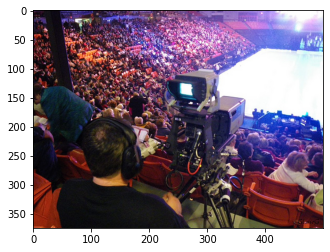

Текст запроса:  Men playing with a red ring out in the field .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  325.04956


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


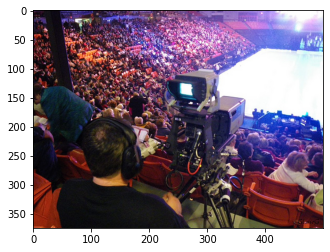

Текст запроса:  Person jumping into the water .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  325.04956


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


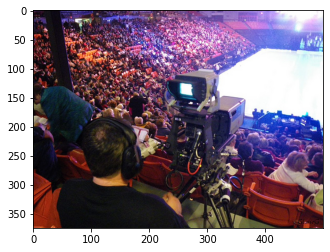

Текст запроса:  The man is on a black and white bike .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  325.04956


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


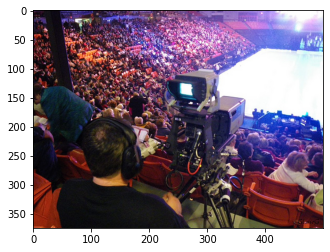

Текст запроса:  A girl in a bikini top with a great view in the background


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  325.04956


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


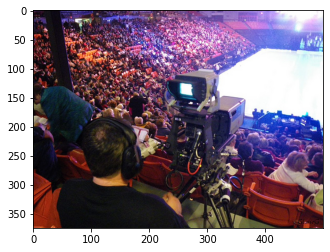

Текст запроса:  There is an older white haired lady and a bulldog sitting on a tree stump .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  325.04956


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


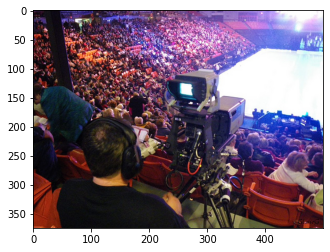

Текст запроса:  A little girl buried in the sand .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  325.04956


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


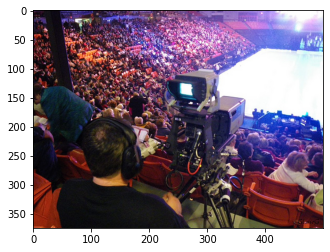

Текст запроса:  two young girls wearing pink outfits playing on yellow monkey bars .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  325.04956


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


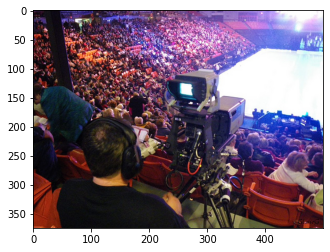

Текст запроса:  The little boy is smiling as he crosses a rope on an assault course .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  325.04956


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


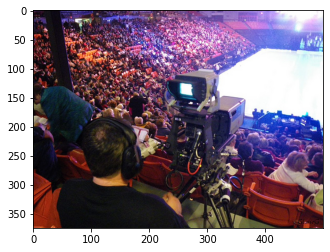

Текст запроса:  Two young girls on a playground .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  325.04956


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


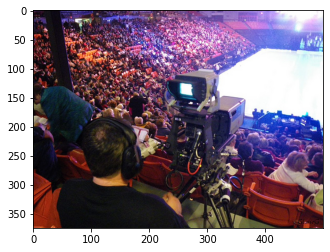

In [182]:
check_model(modelLR, 10)

Вторая – модель случайного леса. 

Текст запроса:  a boy in a blue top is jumping off some rocks in the woods .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  0.19058146642949284


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


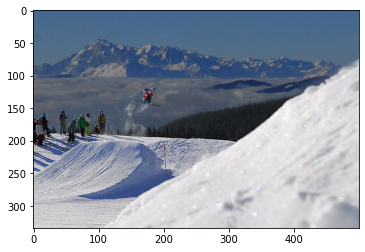

Текст запроса:  Men playing with a red ring out in the field .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  0.19058146642949284


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


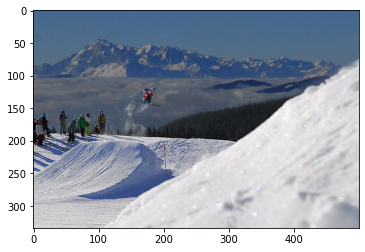

Текст запроса:  Person jumping into the water .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  0.19058146642949284


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


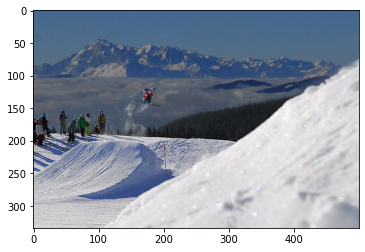

Текст запроса:  The man is on a black and white bike .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  0.19058146642949284


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


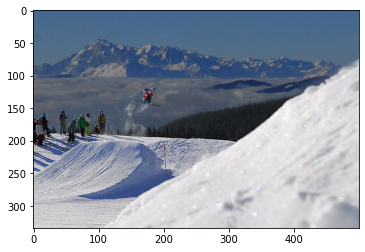

Текст запроса:  A girl in a bikini top with a great view in the background


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  0.19058146642949284


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


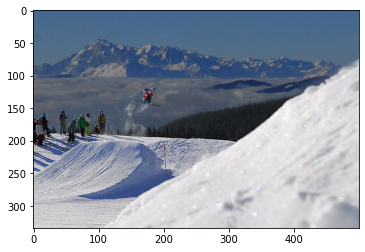

Текст запроса:  There is an older white haired lady and a bulldog sitting on a tree stump .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  0.19058146642949284


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


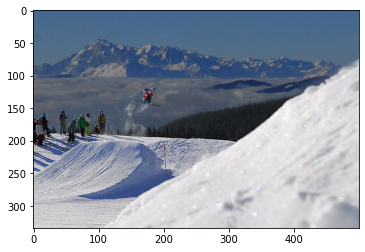

Текст запроса:  A little girl buried in the sand .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  0.19058146642949284


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


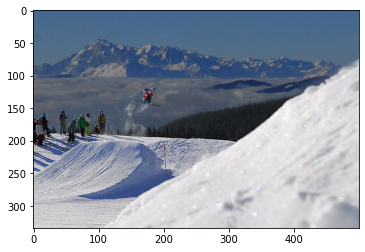

Текст запроса:  two young girls wearing pink outfits playing on yellow monkey bars .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  0.19058146642949284


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


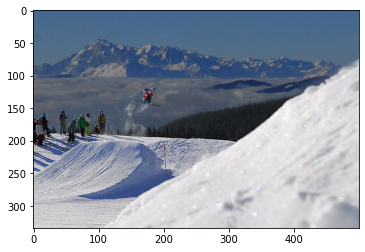

Текст запроса:  The little boy is smiling as he crosses a rope on an assault course .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  0.19058146642949284


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


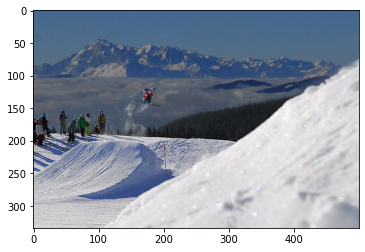

Текст запроса:  Two young girls on a playground .


  0%|          | 0/1 [00:00<?, ?it/s]

Рейтинг близости комментария к изображению:  0.19058146642949284


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


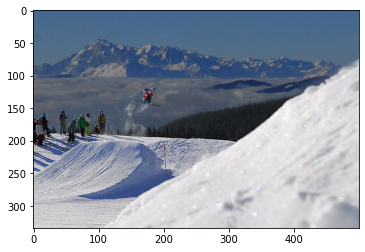

In [183]:
check_model(modelRF, 10)

Третья – модель нейронной сети; 

Текст запроса:  a boy in a blue top is jumping off some rocks in the woods .


  0%|          | 0/1 [00:00<?, ?it/s]

4/4 [==============================] - 0s 5ms/step
Рейтинг близости комментария к изображению:  0.0


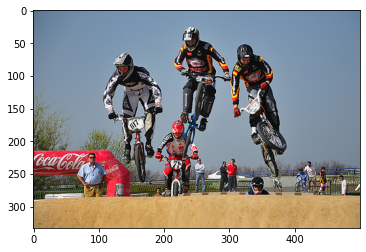

Текст запроса:  Men playing with a red ring out in the field .


  0%|          | 0/1 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step
Рейтинг близости комментария к изображению:  0.0


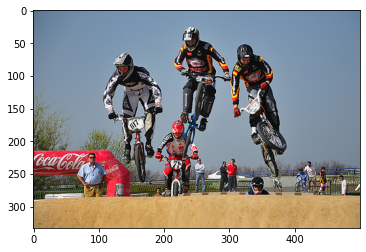

Текст запроса:  Person jumping into the water .


  0%|          | 0/1 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step
Рейтинг близости комментария к изображению:  0.0


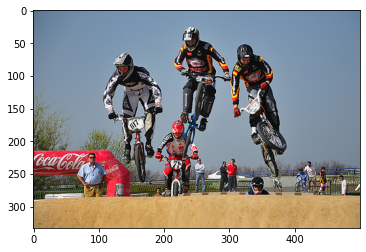

Текст запроса:  The man is on a black and white bike .


  0%|          | 0/1 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step
Рейтинг близости комментария к изображению:  0.0


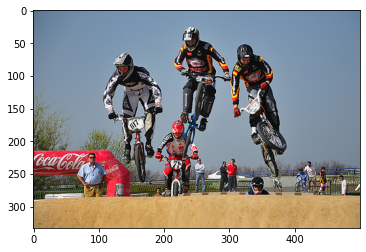

Текст запроса:  A girl in a bikini top with a great view in the background


  0%|          | 0/1 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step
Рейтинг близости комментария к изображению:  0.0


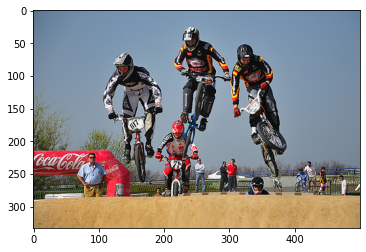

Текст запроса:  There is an older white haired lady and a bulldog sitting on a tree stump .


  0%|          | 0/1 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step
Рейтинг близости комментария к изображению:  0.0


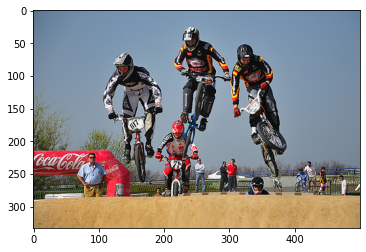

Текст запроса:  A little girl buried in the sand .


  0%|          | 0/1 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step
Рейтинг близости комментария к изображению:  0.0


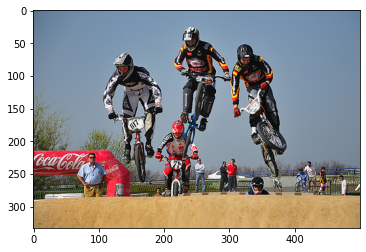

Текст запроса:  two young girls wearing pink outfits playing on yellow monkey bars .


  0%|          | 0/1 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step
Рейтинг близости комментария к изображению:  0.0


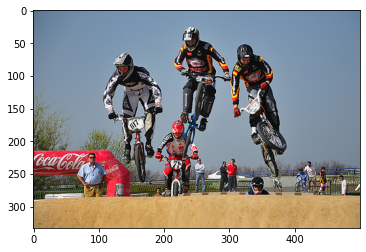

Текст запроса:  The little boy is smiling as he crosses a rope on an assault course .


  0%|          | 0/1 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step
Рейтинг близости комментария к изображению:  0.0


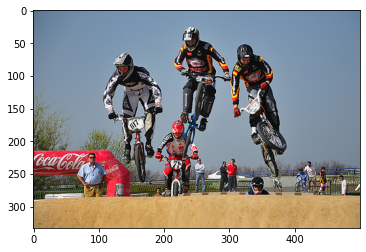

Текст запроса:  Two young girls on a playground .


  0%|          | 0/1 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step
Рейтинг близости комментария к изображению:  0.0


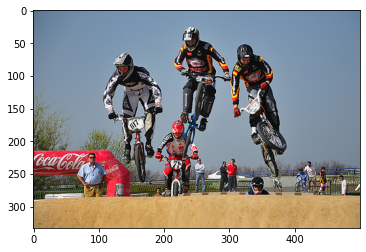

In [184]:
check_model(modelNet, 10)

<div class="alert alert-info">
<b> Комментарий студента</b>

Дальше идёт старый код, оставил для сравнения, не стал пока удалять.
    
- получившиеся модели результат предсказывают достаточно плохо. 
- в ситуации, когда на векторизацию подаётся отдельный текст, а не набор текстов, неожиданно качество модели стало хуже, скорее всего как-то связано с изменением настроек лемматизации, но выглядит достаточно неожиданно. 

</div>

display(testQueries.head())
testQueries.info()

Выберем 10 случайных текстовых запросов. 

testQueries = testQueries.sample(10, random_state=321)
testQueries

Построим эмбэндинги для текстов запросов из тестовой выборки. 

testQueries['query_text'] = testQueries['query_text'].apply(lower_case)

tokenized = testQueries['query_text'].apply(
    lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True))

padded = np.array([i + [0]*(512 - len(i)) for i in tokenized.values])

attention_mask = np.where(padded != 0, 1, 0)

batch_size = 1
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = bertModel(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].numpy())
        
textFeaturesTest = np.concatenate(embeddings)
print(textFeaturesTest.shape)

textFeaturesTest = pd.DataFrame(textFeaturesTest)
testQueries = testQueries.reset_index(drop=True)
textFeaturesTest = pd.merge(testQueries, textFeaturesTest, left_index=True, right_index=True)

print(textFeaturesTest.shape)
textFeaturesTest.head()



Векторизуем все тестовые изображения. 

testImages.head()

%%capture
tmp = []

for i in range(testImages.shape[0]):
    x = cv2.imread('data/datasets/image_search/test_images/' + testImages.loc[i, 'image'])
    x = cv2.resize(x, (224,224))
    x = x[...,::-1]
    y = []
    y.append(np.array(x))
    y = np.asarray(y)
    prediction = modelImg.predict(y)
    tmp.append(prediction[0])

dataImageVecTest = pd.DataFrame(tmp)

dataImageVecTest = pd.merge(dataImageVecTest, testImages, left_index=True, right_index=True)

display(dataImageVecTest.head())

dataImageVecTest.info()

Реализовали векторизацию изображений. Теперь для каждого из 10 комментариев, выбранных нами для тестирования моделей, построим 100 пар комментарий - изображение, проогоним через модель и выберем изображение с наибольшим значением признака.

При обучении моделей в начале были признаки, относящиеся к тексту, потом к изображению. 

Запустим для модели случайного леса. 

for i in range(10):
    queryID = textFeaturesTest.loc[i, 'query_id']
    print('ID комментария: ', queryID)
    print('Комментарий: ', textFeaturesTest.loc[i, 'query_text'])
    tmp = textFeaturesTest[textFeaturesTest['query_id'] == queryID]
    tmp = tmp.drop(['Unnamed: 0', 'query_id', 'query_text', 'image'], axis=1)

    tmp['key'] = 'key'
    dataImageVecTest['key'] = 'key'

    tmp = tmp.merge(dataImageVecTest, on='key')
    tmp = tmp.drop(['key', 'image'], axis=1)

    prediction = modelRF.predict(tmp)
    prediction = pd.DataFrame(prediction)
    prediction.columns = ['pred']
    imageNum = prediction['pred'].idxmax()
    imageName = testImages.loc[imageNum, 'image']

    img = mpimg.imread('data/datasets/image_search/test_images/' + imageName)
    imgplot = plt.imshow(img)
    plt.show()


Теперь запустим для модели линейной регрессии. 

for i in range(10):
    queryID = textFeaturesTest.loc[i, 'query_id']
    print('ID комментария: ', queryID)
    print('Комментарий: ', textFeaturesTest.loc[i, 'query_text'])
    tmp = textFeaturesTest[textFeaturesTest['query_id'] == queryID]
    tmp = tmp.drop(['Unnamed: 0', 'query_id', 'query_text', 'image'], axis=1)

    tmp['key'] = 'key'
    dataImageVecTest['key'] = 'key'

    tmp = tmp.merge(dataImageVecTest, on='key')
    tmp = tmp.drop(['key', 'image'], axis=1)

    prediction = modelLR.predict(tmp)
    prediction = pd.DataFrame(prediction)
    prediction.columns = ['pred']
    imageNum = prediction['pred'].idxmax()
    imageName = testImages.loc[imageNum, 'image']

    img = mpimg.imread('datasets/image_search/test_images/' + imageName)
    imgplot = plt.imshow(img)
    plt.show()

**Вывод**
Проверили результат работы построенных моделей. 

Модель линейной регрессии показала себя плохо, хоть и быстро учится, но результат выдаёт одинаковый. 

Модель, построенная с использованием модели случайного леса повела себя существенно лучше: хоть и выдаёт случайный результат, но на картинках есть элементы из описания. 

На текущий момент это ещё не PoC для заказчика, но подтверждение того, что можно попробовать обучать более сложные модели, требующие больше вычислительных ресурсов. 

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Мысли и идеи ревьюера</b>
    
Да, ты прав использованный подход даже не PoC. И нужно дальше продолжать экспериментировать и искать подходы.
    
    
По поводу альтернативных подходов. Как правило используется следующая стратегия: вектора изображений и тестов выравниваются по длинне (делаем их одной размерности), это легко сделать просто умножив на матрицу (используя полносвязный слой без нелинейности в конце).  И в этом новом пространстве используется некоторая мера близости (косинусное расстояние или скалярное произведение). И весь этот "комбайн" обучается end-to-end на максимально доступном раборе пар изображение/описание. Например, нейронная сеть CLIP от Open AI обучалась на сотнях миллионах пар. 
    
Кстати, почитать про эту нейронку ты можешь например вот здесь например вот здесь  https://habr.com/ru/post/539312/.    
    

Рекомендую тебе попробовать применить эту нейронку в своем проекте. С помощью библиотеки sbert это очень легко, а результаты впечатляют. Заодно получим PoC для заказчика, пусть и с исползованием opensource инструментария.
 
https://www.sbert.net/examples/applications/image-search/README.html  
    
Ты конечно можешь использовать и оригинальный репозиторий, но обертка от sbert наиболее дружелюбна. Кстати, в этой библиотеке есть полезные инструменты для нахождения семантической близости между текстами.
    
    
    
    
</div>

## 8. Выводы

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Проверены экспертные оценки и краудсорсинговые оценки
- [ ]  Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- [ ]  Изображения векторизованы
- [ ]  Текстовые запросы векторизованы
- [ ]  Данные корректно разбиты на тренировочную и тестовую выборки
- [ ]  Предложена метрика качества работы модели
- [ ]  Предложена модель схожести изображений и текстового запроса
- [ ]  Модель обучена
- [ ]  По итогам обучения модели сделаны выводы
- [ ]  Проведено тестирование работы модели
- [ ]  По итогам тестирования визуально сравнили качество поиска

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>
    
Очень интересная работа. Мне понравилось, что ты провел очень содержательное исследование, использовал все доступные данные (экспернтые и крадусорс оценки). Был корректно "почищен" датасет от детских фото, а также извлечены признаки из текста и изображений. 
        
Немного жаль, что ты не примели нейронку в качестве итоговой модели.
    
Осталось выполнить несколько формальных пунктов, уверен, с этим у тебя не возникнет проблем.    
    
   - Пути. Прошу тебя модифицировать код таким образом, чтобы избежать хадкода и при изменении пути к датасету требовалось изменить максимум одну константу.
   - Нужно дать объяснения, почему выбрана именно метрика rmse
   - Нужно оформить функцию для инференса
    
Желтые комментарии на твое усмотрение.
    
Жду твою работу на повторное ревью.
</div>